# Spam or Ham Classifier

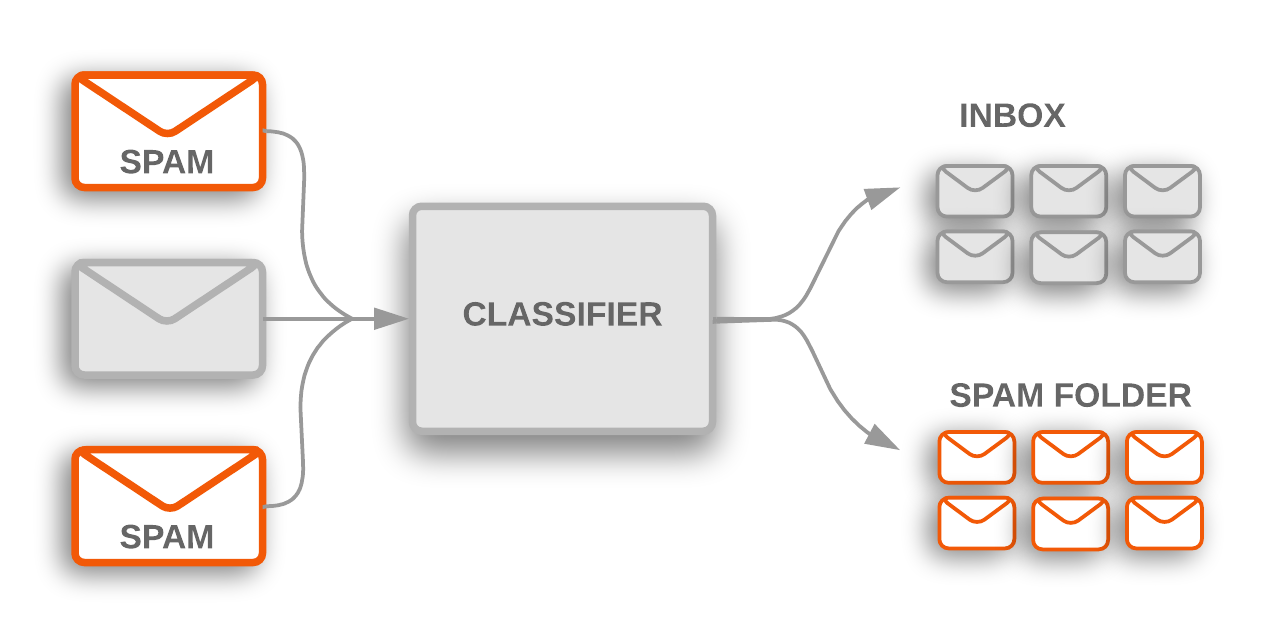

# Table of Contents

- [Loading Packages](#Loading-Packages)
- [Understanding Data](#Understanding-Data)
- [Data Cleaning](#Data-Cleaning)
- [Data Preprocessing](#Data-Preprocessing)
- [Training Models](#Training-Models)
- [Evaluating Models](#Evaluating-Models)
    - [Linear Support Vector Machine Model](#Linear-Support-Vector-Machine-Model)

## Loading Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from time import perf_counter

from IPython.display import Markdown, display
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
    
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading Data
df = pd.read_csv('spam_ham_dataset.csv')

## Understanding Data

In [6]:
# The Shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (5171, 4)


In [7]:
# Preview of the first 5 rows of dataset
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


## Data Cleaning

In [10]:
# Check for missing values
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [11]:
# Check for duplicate values
df.duplicated().sum()

0

In [12]:
# Drop columns that are not neccesary
df = df.drop(['Unnamed: 0'], axis=1)

In [13]:
# Defining 'clean_str' function to remove special characters from 'text' column
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Before Cleaning:')
df['text'][0]

Before Cleaning:


"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [14]:
print('After Cleaning:')
clean_str(df['text'][0])

After Cleaning:


'subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes'

In [15]:
# Applying 'clean_str' function and storing in new column 'text_clean'
df['text_clean'] = df['text'].apply(lambda string: clean_str(string))
# Dropping 'text' column
df = df.drop(['text'], axis=1)

In [16]:
df.head()

,label,label_num,text_clean
0,ham,0,subject enron methanol meter this is a follow ...
1,ham,0,subject hpl nom for january see attached file ...
2,ham,0,subject neon retreat ho ho ho we re around to ...
3,spam,1,subject photoshop windows office cheap main tr...
4,ham,0,subject re indian springs this deal is to book...


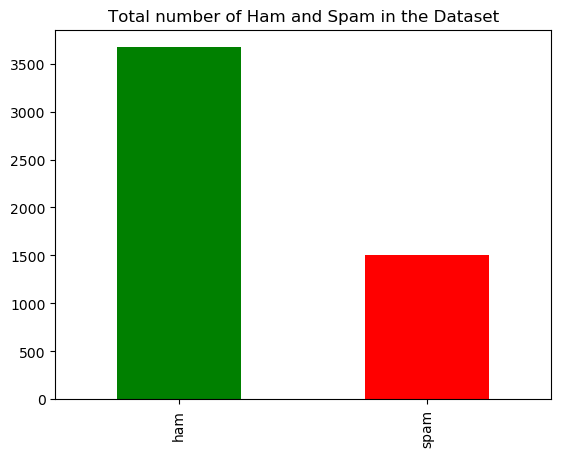

In [17]:
df['label'].value_counts().plot.bar(color=['g','r'])
plt.title('Total number of Ham and Spam in the Dataset')
plt.show()

## Data Preprocessing

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer()
X = cv.fit_transform(df.text_clean)

# Get the categories
y = df.label

In [19]:
# Splitting arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training Models

In [21]:
models = {
    "Logistic Regr": {"model": LogisticRegression(), "perf":0},
    "KNN": {"model": KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model": DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model": LinearSVC(), "perf":0},
    "SVM (RBF)": {"model": SVC(), "perf":0},
    "Random Forest": {"model": RandomForestClassifier(), "perf":0},
    "Gradient Boost": {"model": GradientBoostingClassifier(), "perf":0},
    "XGBoost": {"model": XGBClassifier(eval_metric='mlogloss'), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration, 2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Logistic Regr        trained in 12.56 sec
KNN                  trained in 0.01 sec
Decision Tree        trained in 0.96 sec
SVM (Linear)         trained in 0.24 sec
SVM (RBF)            trained in 8.59 sec
Random Forest        trained in 0.56 sec
Gradient Boost       trained in 28.68 sec
XGBoost              trained in 244.65 sec


In [22]:
model_acc = []
for name, model in models.items():
    model_acc.append([name, model["model"].score(X_test, y_test), model["perf"]])

## Evaluating Models

In [23]:
df_acc = pd.DataFrame(model_acc)
df_acc.columns = ['Model', 'Accuracy w/o Scaling', 'Training Time (sec)']
df_acc.sort_values(by = 'Accuracy w/o Scaling', ascending=False, inplace=True)
df_acc.reset_index(drop=True, inplace=True)
df_acc

,Model,Accuracy w/o Scaling,Training Time (sec)
0,XGBoost,0.974879,244.65
1,Logistic Regr,0.973913,12.56
2,SVM (Linear),0.964251,0.24
3,Gradient Boost,0.960386,28.68
4,Decision Tree,0.957488,0.96
5,Random Forest,0.951691,0.56
6,KNN,0.871498,0.01
7,SVM (RBF),0.723671,8.59


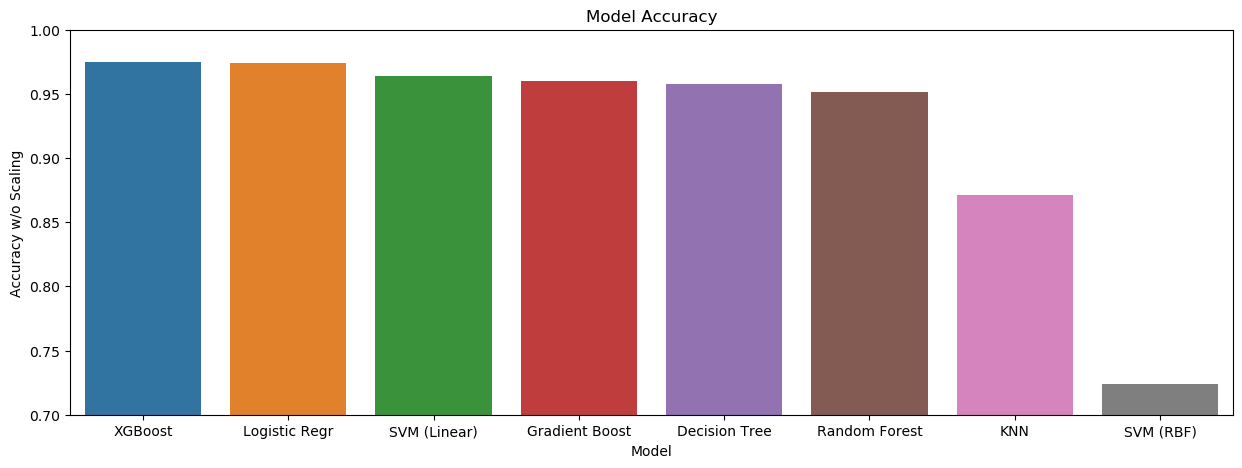

In [24]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'Model', y = 'Accuracy w/o Scaling', data = df_acc)
plt.title('Model Accuracy')
plt.ylim(0.7, 1)
plt.show()

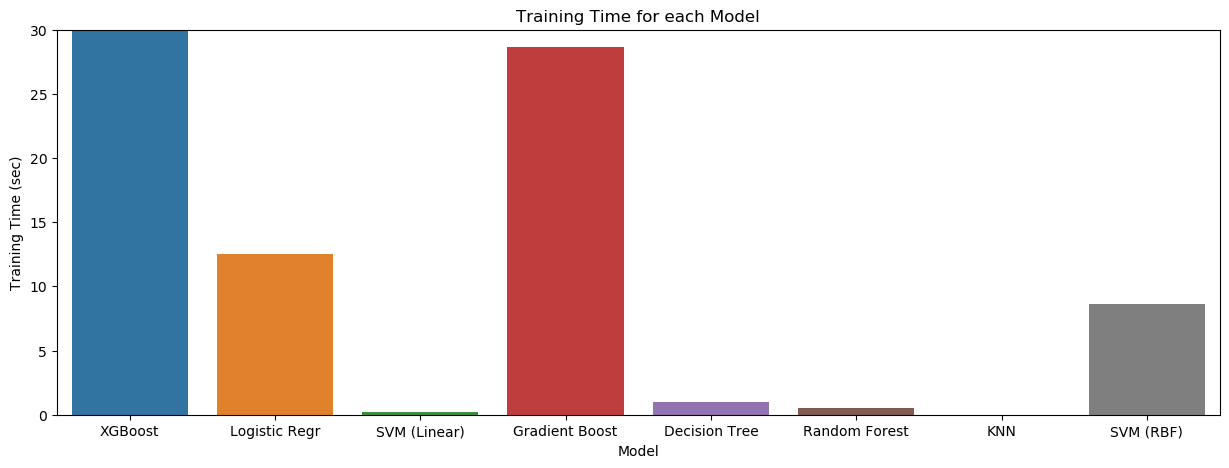

In [25]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'Model', y = 'Training Time (sec)', data = df_acc)
plt.title('Training Time for each Model')
plt.ylim(0, 30)
plt.show()

XGBoosting has the best accuracy on the test set, however with a long training time.  Linear SVM is nearly as good with 96%+ accuracy, but with a much faster training time.\
(0.2 seconds compared to the much longer training time of XGBoosting)\
In the following part, we'll choose the Linear SVM for our classification model.

## Linear Support Vector Machine Model

In [26]:
model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.97      0.97       732
        spam       0.92      0.96      0.94       303

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.96      1035
weighted avg       0.96      0.96      0.96      1035



In [27]:
printmd(f'## Accuracy: {round(accuracy_score(y_test, y_pred),3)*100}%')
              

## Accuracy: 96.39999999999999%

In [28]:
def display_result(df, number=2):
    for i in range(number):
        msg = df['text_clean'].iloc[i]
        label = df["label"].iloc[i]
        msg_vec = cv.transform([msg])
        pred_label = model.predict(msg_vec)
        printmd(f"**Real: {label}, Predicted: {pred_label[0]}**")
        printmd(f"**E-Mail:** {msg}")
        
df_spam = df[df['label'] == 'spam']
df_ham = df[df['label'] == 'ham']
display_result(df_spam)
display_result(df_ham)

**Real: spam, Predicted: spam**

**E-Mail:** subject photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin

**Real: spam, Predicted: spam**

**E-Mail:** subject looking for medication we re the best source it is difficult to make our material condition better by the best law but it is easy enough to ruin it by bad laws excuse me you just found the best and simpliest site for medication on the net no perscription easy delivery private secure and easy better see rightly on a pound a week than squint on a million we ve got anything that you will ever want erection treatment pills anti depressant pills weight loss and more http splicings bombahakcx com knowledge and human power are synonymous only high quality stuff for low rates moneyback guarantee there is no god nature sufficeth unto herself in no wise hath she need of an author

**Real: ham, Predicted: ham**

**E-Mail:** subject enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes

**Real: ham, Predicted: ham**

**E-Mail:** subject hpl nom for january see attached file hplnol xls hplnol xls